# Phasor domain state estimation

In [1]:
from state_estimation_phasor import *

In [2]:
"""State estimation (bus injection model: V-I)"""
output_data_dir = '../temp/state_estimation_BIM'
measured_injections = {
    "bus_1014|bus_1015|bus_1016|bus_1017|bus_1019|bus_1020|bus_1027|bus_1029|bus_1030|bus_1031|bus_1032|bus_1033|bus_1037|bus_1038|bus_1053|bus_1199": 
        [{"element": "line_381", "sign": 1}],
    "bus_1118|bus_1119|bus_1120|bus_1127": 
        [{"element": "cb_146", "sign": -1}],
    "bus_1082|bus_1083|bus_1084": 
        [{"element": "cb_137", "sign": -1}],
    "bus_1097|bus_1098|bus_1099": 
        [{"element": "cb_140", "sign": -1}],
    "bus_1106|bus_1107|bus_1108": 
        [{"element": "cb_143", "sign": -1}],
    "bus_1069|bus_1070|bus_1071|bus_1078": 
        [{"element": "cb_134", "sign": -1}],
    # Zero-injection buses below
    "bus_1034|bus_1041|bus_1042|bus_1043|bus_1044|bus_1045|bus_1046": [],
    "bus_1066|bus_1067|bus_1068": [],
    "bus_1103|bus_1104|bus_1105": [],
    "bus_1091|bus_1092|bus_1093": [],
    "bus_1054|bus_1055|bus_1056|bus_1057|bus_1058|bus_1059|bus_1079|bus_1080|bus_1081": [],
    "bus_1115|bus_1116|bus_1117": [],
}
datetimespan = ('2024-11-15T17:00:00', '2024-11-15T17:05:00')
state_estimator = StateEstimator(
    network_files=[os.path.join(FILE_PATHS['net_files'], 'circuit3')], 
    input_data_dir=FILE_PATHS['phasors'],
    output_data_dir=output_data_dir,
    phase_ref='bus_1038.ag',
    delta_t_threshold=1.0,
)
state_estimator.state_estimation(
    datetimespan, 
    print_info=False,
    keep_cc=[0],
    prune_nodes=["bus_1130|bus_1142|bus_1144|bus_1146|bus_1147"],
    prune_edges=[],
    measured_injections=measured_injections,
    algorithm='businjection_VI',
)

Distinct topologies starting at the following timestamps: ['2024-11-13T23:30:42.000000']
[Warning] Unknown phase configuration: ['ab'] for bus_1041


100%|██████████| 30/30 [00:00<00:00, 98.77it/s]


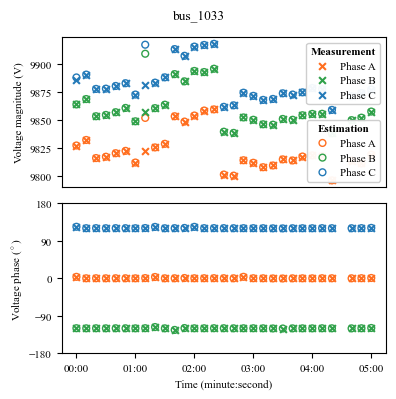

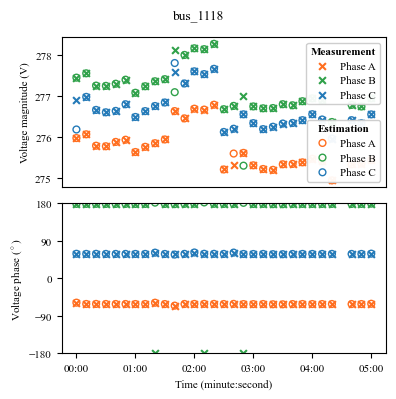

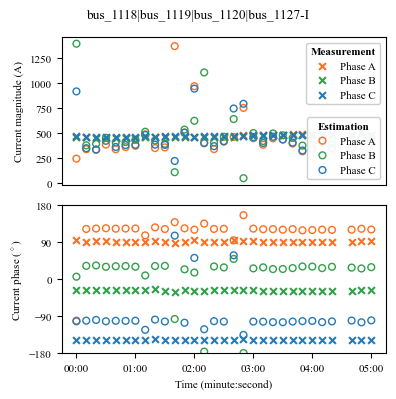

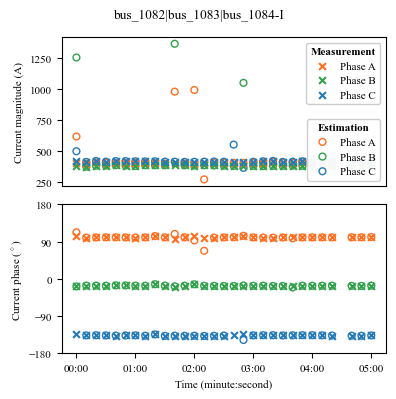

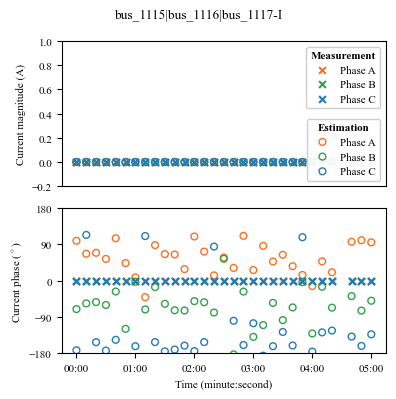

In [3]:
# Plotting
elements_to_plot = ['bus_1033', 'bus_1118'] # 'bus_1034', 'bus_1082', 'bus_1097', 'bus_1106', 'bus_1069'
elements_to_plot += ["bus_1118|bus_1119|bus_1120|bus_1127-I", "bus_1082|bus_1083|bus_1084-I", "bus_1115|bus_1116|bus_1117-I"] # "bus_1027|bus_1029|bus_1031|bus_1019|bus_1030|bus_1199|bus_1015|bus_1014|bus_1016|bus_1032|bus_1053|bus_1037|bus_1017|bus_1020|bus_1038|bus_1033-I", "bus_1097|bus_1098|bus_1099-I", "bus_1106|bus_1107|bus_1108-I", "bus_1069|bus_1070|bus_1071|bus_1078-I"
plot_results(output_data_dir, datetimespan, elements_to_plot, base_figsize=(4, 2), fontsize=8, combine_3_phase=True)
print_results(output_data_dir, datetimespan)

In [4]:
"""State estimation (branch flow model: V-I)"""
output_data_dir = '../temp/state_estimation_BFM'
datetimespan = ('2024-11-15T17:00:00', '2024-11-15T17:05:00')
state_estimator = StateEstimator(
    network_files=[os.path.join(FILE_PATHS['net_files'], 'circuit3')], 
    input_data_dir=FILE_PATHS['phasors'],
    output_data_dir=output_data_dir,
    phase_ref='bus_1038.ag',
    delta_t_threshold=1.0,
)
state_estimator.state_estimation(datetimespan, print_info=False)

Distinct topologies starting at the following timestamps: ['2024-11-13T23:30:42.000000']


100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


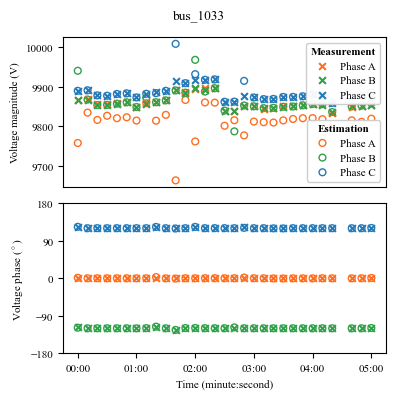

[Warning] No ground truth measurement data for bus_1034.


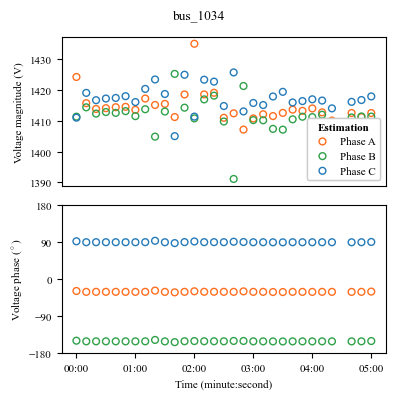

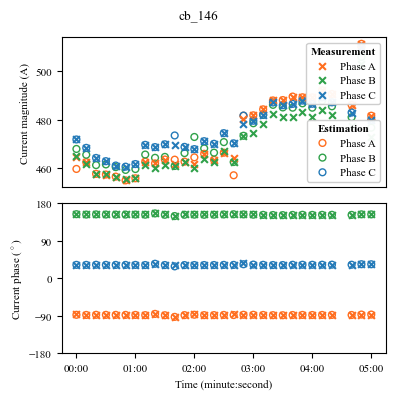

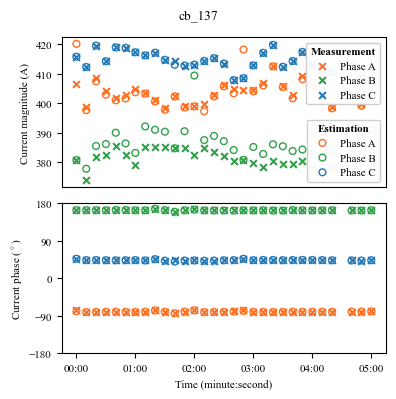

In [5]:
elements_to_plot = ['bus_1033', 'bus_1034', ] # 'bus_1118', 'bus_1082', 'bus_1097', 'bus_1106', 'bus_1069'
elements_to_plot += ["cb_146", "cb_137", ] # 'line_381', "cb_140", "cb_143", "cb_134"
plot_results(output_data_dir, datetimespan, elements_to_plot, base_figsize=(4, 2), fontsize=8, combine_3_phase=True)
print_results(output_data_dir, datetimespan)